In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

df1 = pd.read_csv('datasets/london_house_prices.csv')
df1.head()

,id,bedrooms,bathrooms,tenure,garden,street,size_sqft,price_pounds,nearest_station_name,nearest_station_miles,postcode_outer
0,132180206,5.0,4.0,freehold,0,"Ladbroke Grove, London",NaN,10500000,Holland Park Station,0.2,NaN
1,134996630,6.0,5.0,freehold,0,"Murray Road, Wimbledon Village, SW19",NaN,8950000,Wimbledon Station,0.3,SW19
2,134169233,7.0,5.0,freehold,1,"Southside Common, Wimbledon Village, SW19",NaN,11950000,Wimbledon Station,0.7,SW19
3,132180206,5.0,4.0,freehold,0,"Ladbroke Grove, London",NaN,10500000,Holland Park Station,0.2,NaN
4,134996630,6.0,5.0,freehold,0,"Murray Road, Wimbledon Village, SW19",NaN,8950000,Wimbledon Station,0.3,SW19


In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     934 non-null    int64  
 1   bedrooms               919 non-null    float64
 2   bathrooms              899 non-null    float64
 3   tenure                 922 non-null    object 
 4   garden                 934 non-null    int64  
 5   street                 934 non-null    object 
 6   size_sqft              417 non-null    float64
 7   price_pounds           934 non-null    int64  
 8   nearest_station_name   934 non-null    object 
 9   nearest_station_miles  934 non-null    float64
 10  postcode_outer         797 non-null    object 
dtypes: float64(4), int64(3), object(4)
memory usage: 80.4+ KB


In [3]:
df2 = pd.read_csv('datasets/London.csv')
df2.head()

,id,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 3480 non-null   int64 
 1   Property Name      3480 non-null   object
 2   Price              3480 non-null   int64 
 3   House Type         3480 non-null   object
 4   Area in sq ft      3480 non-null   int64 
 5   No. of Bedrooms    3480 non-null   int64 
 6   No. of Bathrooms   3480 non-null   int64 
 7   No. of Receptions  3480 non-null   int64 
 8   Location           2518 non-null   object
 9   City/County        3480 non-null   object
 10  Postal Code        3480 non-null   object
dtypes: int64(6), object(5)
memory usage: 299.2+ KB


marge the two datasets 

In [5]:
df2.drop(['id', 'City/County','No. of Bathrooms','No. of Receptions','Property Name','Location'], axis='columns', inplace=True)
df1.drop(['id', 'nearest_station_name','street','tenure'], axis='columns', inplace=True)

In [6]:
df2.rename(columns = {'No. of Bedrooms':'Bedrooms'}, inplace = True)
df1.rename(columns = {'price_pounds':'Price','size_sqft':'Area in sq ft','postcode_outer':'Postal Code','bedrooms':'Bedrooms','bathrooms':'Bathrooms'}, inplace = True)

In [7]:
df1.head()

,Bedrooms,Bathrooms,garden,Area in sq ft,Price,nearest_station_miles,Postal Code
0,5.0,4.0,0,NaN,10500000,0.2,NaN
1,6.0,5.0,0,NaN,8950000,0.3,SW19
2,7.0,5.0,1,NaN,11950000,0.7,SW19
3,5.0,4.0,0,NaN,10500000,0.2,NaN
4,6.0,5.0,0,NaN,8950000,0.3,SW19


In [8]:
df2.head()

,Price,House Type,Area in sq ft,Bedrooms,Postal Code
0,1675000,House,2716,5,SW19 8NY
1,650000,Flat / Apartment,814,2,EC1V 3PA
2,735000,Flat / Apartment,761,2,SW15 1QL
3,1765000,House,1986,4,SW15 1LP
4,675000,Flat / Apartment,700,2,SW15 1PL


In [9]:
df = pd.merge(df1, df2, how='outer')
df = df.dropna(subset=['Price'])
df = df.dropna(subset=['Area in sq ft','Bedrooms'] , how='any')
df.rename(columns = {'garden':'Garden', 'nearest_station_miles':'Nearest station miles'}, inplace = True)
df.head()

,Bedrooms,Bathrooms,Garden,Area in sq ft,Price,Nearest station miles,Postal Code,House Type
9,6.0,6.0,1.0,4460.0,10950000,0.3,W1J,NaN
10,6.0,6.0,1.0,4460.0,10950000,0.3,W1J,NaN
15,6.0,6.0,1.0,4563.0,11750000,0.3,SW1X,NaN
16,6.0,6.0,1.0,4563.0,11750000,0.3,SW1X,NaN
21,5.0,4.0,0.0,3599.0,6500000,0.1,SW6,NaN


# Handle missing values

In [10]:
df.isna().sum()

Bedrooms                    0
Bathrooms                3491
Garden                   3480
Area in sq ft               0
Price                       0
Nearest station miles    3480
Postal Code                40
House Type                413
dtype: int64

In all the df2's records the bedrooms number is equal to bathrooms number, we assumed that this is a mistake, so we deleted the number of bathrooms and now we predict their number by df1

<Axes: >

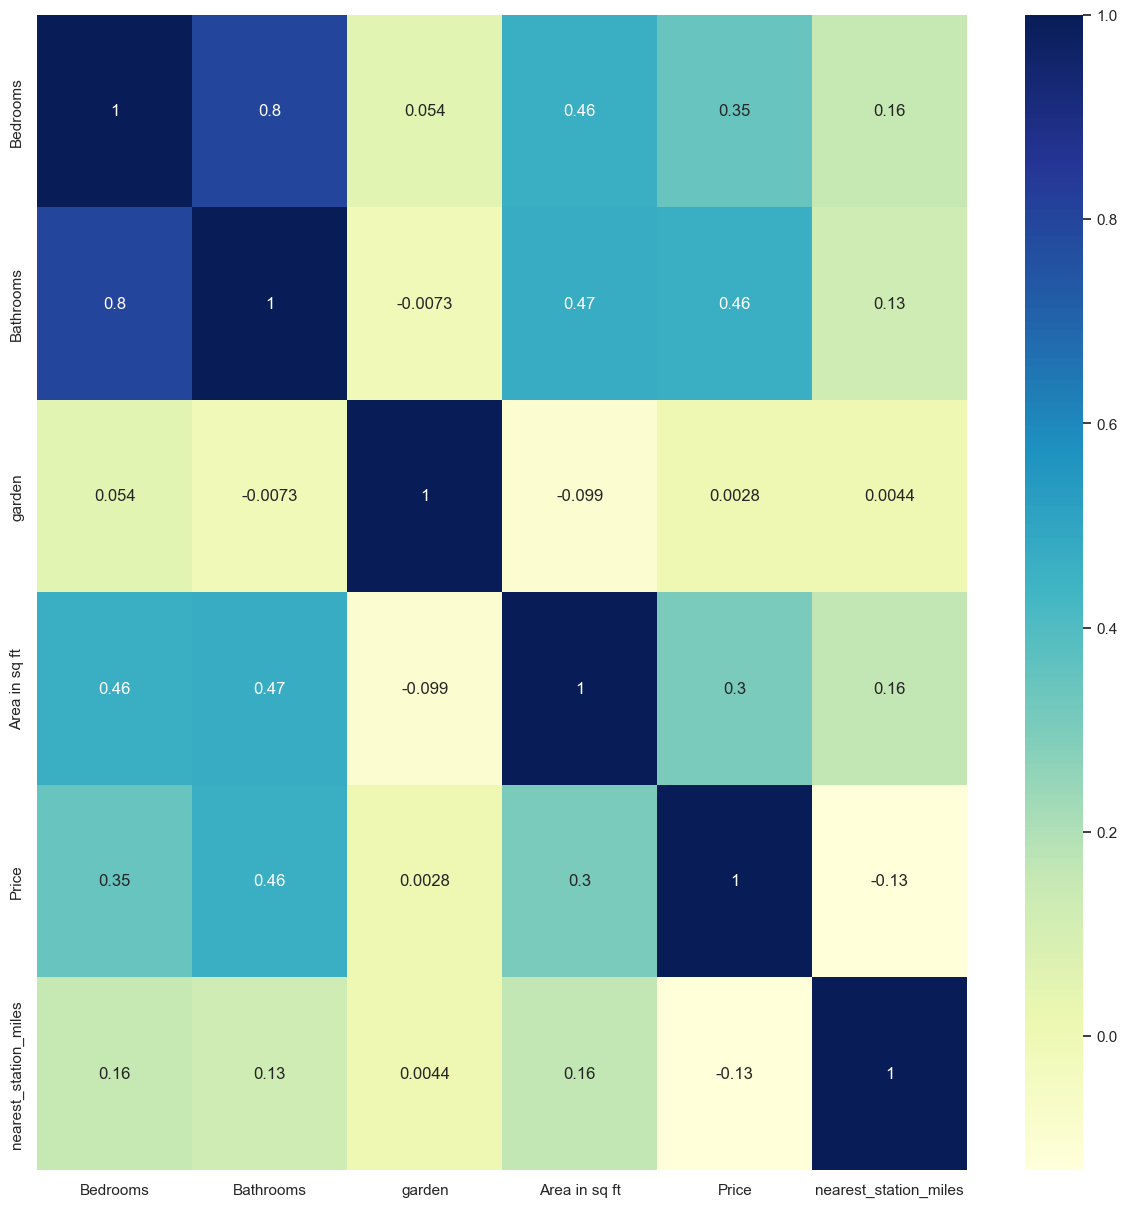

In [11]:
sns.set(rc = {'figure.figsize':(15, 15)})
sns.heatmap(df1.corr(numeric_only=True), cmap='YlGnBu', annot=True)

In [12]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

correlation_df1 = df1.corr(numeric_only=True)
threshold = 0.3
filtered = np.abs(correlation_df1['Bathrooms']) > threshold 
wanted_features = correlation_df1.columns[filtered].tolist()
unwanted_features = [column for column in df1.columns if column not in correlation_df1.columns[filtered].tolist() or column == 'Bathrooms']
predictors_features = [column for column in df1.columns if column not in unwanted_features]
predictors_features

['Bedrooms', 'Area in sq ft', 'Price']

In [13]:
unwanted_features

['Bathrooms', 'garden', 'nearest_station_miles', 'Postal Code']

In [14]:
df1 = df1.dropna(subset=['Bathrooms'])
X_train, X_test, Y_train, Y_test = train_test_split(df1.drop(columns=unwanted_features), df1['Bathrooms'], shuffle=True)
model = HistGradientBoostingRegressor()
model.fit(X_train, Y_train)
missing_rows = df[df['Bathrooms'].isna()]
missing_values = model.predict(missing_rows[predictors_features])
df.loc[df['Bathrooms'].isna(), 'Bathrooms'] = missing_values

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3893 entries, 9 to 4413
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Bedrooms               3893 non-null   float64
 1   Bathrooms              3893 non-null   float64
 2   Garden                 413 non-null    float64
 3   Area in sq ft          3893 non-null   float64
 4   Price                  3893 non-null   int64  
 5   Nearest station miles  413 non-null    float64
 6   Postal Code            3853 non-null   object 
 7   House Type             3480 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 273.7+ KB


In [16]:
df

,Bedrooms,Bathrooms,Garden,Area in sq ft,Price,Nearest station miles,Postal Code,House Type
9,6.0,6.000000,1.0,4460.0,10950000,0.3,W1J,NaN
10,6.0,6.000000,1.0,4460.0,10950000,0.3,W1J,NaN
15,6.0,6.000000,1.0,4563.0,11750000,0.3,SW1X,NaN
16,6.0,6.000000,1.0,4563.0,11750000,0.3,SW1X,NaN
21,5.0,4.000000,0.0,3599.0,6500000,0.1,SW6,NaN
...,...,...,...,...,...,...,...,...
4409,3.0,3.192202,NaN,1410.0,3350000,NaN,SW6 1UE,New development
4410,3.0,3.004436,NaN,1749.0,5275000,NaN,SW1A 1JT,Flat / Apartment
4411,6.0,4.484740,NaN,4435.0,5995000,NaN,NW11 6TG,House
4412,3.0,2.955126,NaN,1506.0,6300000,NaN,W1S 3AR,New development


# Data Normalization

In [17]:
y_min = df['Price'].min()
y_max = df['Price'].max()

def convert_label_value(pred):
    return pred*(y_max - y_min) + y_min

def normalize_value(val):
    return (val - val.min()) / (val.max() - val.min())

# transform numeric variables between 0 and 1.
# Remove 'Garden' from the list of numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
numerical_columns.remove('Garden')

for column in numerical_columns:
    df[column] = normalize_value(df[column])

df.head()

,Bedrooms,Bathrooms,Garden,Area in sq ft,Price,Nearest station miles,Postal Code,House Type
9,0.214286,0.263158,1.0,0.160489,0.143945,0.068182,W1J,NaN
10,0.214286,0.263158,1.0,0.160489,0.143945,0.068182,W1J,NaN
15,0.214286,0.263158,1.0,0.164196,0.154638,0.068182,SW1X,NaN
16,0.214286,0.263158,1.0,0.164196,0.154638,0.068182,SW1X,NaN
21,0.178571,0.157895,0.0,0.129507,0.084469,0.022727,SW6,NaN
